Saatvik Sandal 114378631

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mp
import math as math
import matplotlib.pyplot as plt



In [9]:
def f(x):
    return (np.exp(-x**3) - (x**4) - (np.sin(x)))

def f_prime(x):
    return ((-3 * np.exp(-x**3) * (x**2)) - (4 * (x**3)) - np.cos(x))

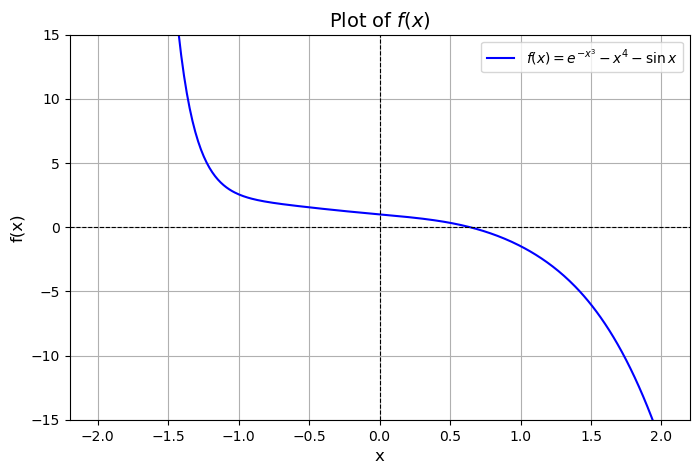

In [4]:
x = np.linspace(-2, 2, 400)
y = f(x)


# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r"$f(x) = e^{-x^3} - x^4 - \sin x$", color='b')

# Highlighting x and y axes
plt.axhline(0, color='black', linewidth=0.8, linestyle="--")
plt.axvline(0, color='black', linewidth=0.8, linestyle="--")

# Adjust y-limits dynamically
plt.ylim(-15, 15)

# Improve visualization
plt.title("Plot of $f(x)$", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# 1.1 Method 1: Bisection

In [13]:
bisection_iteration_count = 0
def Bisection(a, b, tolerance):
    global bisection_iteration_count
    c = 0
    while(((b-a) / 2) > tolerance):
        bisection_iteration_count += 1
        c = (b+a) / 2
        test = f(a) * f(c)

        if(test < 0):
            b = c
        elif(test > 0):
            a = c
        else:
            return c
    
    return c

print(f"Xc = {Bisection(-1, 1, 1e-10)}")
print(f"Number of iteration counts for Bisection is: {bisection_iteration_count}")
# 7 fp operations in f(x), per loop in bisection, there is 19, incuding f(x)
print(f"There 19 floating point operations required each iteration, so in total {19 * bisection_iteration_count} floating point operations")

Xc = 0.6415825419826433
Number of iteration counts for Bisection is: 34
There 19 floating point operations required each iteration, so in total 646 floating point operations


# 1.1 Method 2: Newton

In [17]:
newton_iteration_count = 0
def Newton(x0, tolerance = 1e-5):
    global newton_iteration_count
    newton_iteration_count += 1
    if abs(x0 - 0.641583) <= tolerance:
        return x0
    #print(x0)
    return Newton(x0 - (f(x0) / f_prime(x0)))

print(f"Xc = {Newton(0)}")
print(f"Number of iteration counts for Newton is: {newton_iteration_count}")
#f(x) has 7 fp, f_prime(x) has 10, so every loop in newton has 7 + 10 + 1 + 1 = 19
print(f"There 19 floating point operations required each iteration, so in total {19 * newton_iteration_count} floating point operations")

Xc = 0.6415825512515503
Number of iteration counts for Bisection is: 6
There 19 floating point operations required each iteration, so in total 114 floating point operations


# 1.1 Method 3: Secant Method

In [21]:
secant_iteration_count = 0
def Secant(x0, x1, tolerance = 1e-5):
    global secant_iteration_count
    secant_iteration_count += 1

    if abs(x1 - 0.641583) <= tolerance:
        print(x1)
        return x1
    xipo = x1 - ((x1 - x0) * (f(x1) / (f(x1) - f(x0))))
    return Secant(x1, xipo)

print(f"Xc = {Secant(-1, 1)}")
print(f"Number of iteration counts for Secant is: {secant_iteration_count}")
#f(x) has 7 fp, ever loop in secant has 26 total including f(x)
print(f"There 26 floating point operations required each iteration, so in total {26 * secant_iteration_count} floating point operations")

0.6415908941839591
Xc = 0.6415908941839591
Number of iteration counts for Bisection is: 7
There 26 floating point operations required each iteration, so in total 182 floating point operations


# 1.1 Method 4: Monte Carlo method

In [22]:
def Monte(range_low, range_high, samples= 10000): 

    uniform_dist = np.random.uniform(range_low, range_high, samples)

    y_vals = np.abs(f(uniform_dist))

    xc = uniform_dist[np.argmin(y_vals)]

    return xc

print(f"Xc = {Monte(0.5, 0.75)}")
print("Number of times we sampled the uniform distribution is 10000")
print("f(x) has 7 floating point operations, and we applied that to all 10000 samples, so 70,000 floating point operations. Monte has atleast 70,000 floating point operations in this specific instance.")

Xc = 0.6415842843599304
Number of times we sampled the uniform distribution is 10000
f(x) has 7 floating point operations, and we applied that to all 10000 samples, so 70,000 floating point operations. Monte has atleast 70,000 floating point operations in this specific instance.


# 1.2 Polynomial Interpolation